# Bearbeitung der Übung 2

Erarbeitet von | Kilian Lorenz|Jacob Ruhnau
---:|---:|---:
Matrikel-Nr.|8485476|2441453
Studiengang|WDS22|WWI22a
Mail|lorenzk@dhbw-loerrach.de|ruhnauja@dhbw-loerrach.de



### Übung 1

In der Vorlesung hatten wir gesehen, dass der Insertion-Sort Algorithmus eine Laufzeit-Komplexität von $\theta (n^2)$ aufweist. Leiten Sie dies her. Nehmen Sie dazu den schlechtesten Fall an ('worst case time complexity'). Sie können dabei annehmen, dass die Arbeit für einen Tausch (swap) und einen Vergleich (comparisson) jeweils $
**[5 points]**

Tipp: Erinnern Sie sich an die "Geschichte des schlauen Mathematikers", der die Zahlen geschickt aufaddierte:
$$ \sum_{q=1}^p q= \frac{p \cdot (p+1)}{2} $$


Anmerkung: Sie können die Herleitung in der Markdown Zelle hier machen, oder auf einem Zettel und diesen einscannen.

##### _Zur Übung 1:_ Herleitung Big-O des Insertion-Sort Algorithmus


Der Algorithmus arbeitet mit zwei ineinander verschachtelten Schleifen. Die erste Schleife durchläuft die Menge von vorne nach hinten. Die zweite Schleife vergleicht immer das aktuelle Element mit allen vorherigen Elemente. Dieser Ablauf wird solange wiederholt bis der passende Platz für das aktuelle Element gefunden ist, im Zweifel für jedes Element. Da jede dieser Schleifen durch das Verfahren eine Zeitkomplexität von $\Theta(n)$ aufweist, ergibt sich für den Insertion-Sort Algorithmus eine Gesamtkomplexität von $\Theta(n^2)$. Das hat zur Folge, das der Algorithmus bei großen und unsortierten Mengen länger braucht. 

### Übung 2

a) Schreiben Sie eine Python implementierung eines Insertion-Sort Algoritmus.   
**[4 points]**

Hinweis: Copy-paste einer Internt-Vorlage zählt nicht.

In [59]:
def insertion_sort(array: list) -> list:

    if(len(array) < 0):
        print(array)
        raise ValueError("Provided array must be 1d array of a length greater then 1.")
    for i in array: 
        if(isinstance(i, int) == False):
            print(i)
            raise ValueError("Provided array must be 1d array of type int.")
        
    work_array = array.copy()

    for i in range(1, len(work_array)):
        swap_el = work_array[i]
        j = i - 1
        while j >= 0 and swap_el < work_array[j]:
            work_array[j+1] = work_array[j]
            j -= 1
        work_array[j+1] = swap_el
    return(work_array)

def display_algo_correctness(array:list) ->str:
    return_array = insertion_sort(array=array)
    print(f"Algorithm is correct: {array.sort() == print(return_array)}")

In [60]:
my_array_1 = [4,5,6,1]

display_algo_correctness(my_array_1)

[1, 4, 5, 6]
Algorithm is correct: True


Weiter ist hier ist eine Implementierung eines Merge-Sort Algorithmus. Sie benötigen sie für Aufgabe 3.

In [4]:
def merge_sort(array):
    if len(array) > 1:
        #  r is the point where the array is divided into two subarrays
        r = len(array)//2
        L = array[:r]
        M = array[r:]

        # Sort the two halves
        merge_sort(L)
        merge_sort(M)

        i = j = k = 0

        # Until we reach either end of either L or M, pick larger among
        # elements L and M and place them in the correct position at A[p..r]
        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1

        # When we run out of elements in either L or M,
        # pick up the remaining elements and put in A[p..r]
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1

In [51]:
my_array_2 = [6, 5, 12, 10, 9, 1]

merge_sort(my_array_2)
display_algo_correctness(my_array_2)

[1, 5, 6, 9, 10, 12]
Algorithm is correct: True


### Übung 3

a) Messen Sie die Laufzeiten für beide Algorihmen (Insertion- and Merge-Sort) aus Übung 2 für die Arrays
- list(range(100,1,-1))
- list(range(1000,1,-1))
- list(range(5000,1,-1))
- list(range(10000,1,-1))
- list(range(25000,1,-1))

**[5 points]**

Tipp: Um die Laufzeiten Ihrer Algorithmen zu bestimmen, können Sie das timeit oder das time Modul nutzen. Eine "average-Laufzeit" Bestimmung ist nicht nötig, sprich ein Durchgang genügt jeweils. Lasten Sie den PC jedoch während der Rechnungen nicht andersweitig aus (z.B. durch andere Programme), um das Ergebnis nicht zu verfälschen.

In [7]:
import timeit

# Method which takes a list of values greater which serve as upper bounderies for an array. 
# For each boundery an array will be created which gets sorted by both the implemented insertion sort algorithm and merge sort algorithm while the runtime of both alogoritms will get measured.
# The method returns a 2d dict with the values from the value list as key and value beeing a dict with "merge" and "insertion" as keys and the measured times as values.
def create_runtimes(value_list: list) -> dict:
    times = {}

    for i in range(len(value_list)):

        array = list(range(value_list[i], 1, -1))

        time_merge = timeit.timeit(lambda: merge_sort(array.copy()), number=1)
        time_insortion = timeit.timeit(lambda: insertion_sort(array.copy()), number=1)
        times[value_list[i]] = {"merge": round(time_merge, 4), "insertion": round(time_insortion, 4)}

    return(times)

# Method to get a quick overview for each boundery from the measurments made in create_runtime(). 
# For each array the runtime of both algorthms will be printed out.
def display_time_deltas(times:dict) -> str:
    for key, value in times.items():
        print(f"Runtime with array of range {key}: {value} seconds.")
        

In [10]:
upper_list_1 = [10, 100, 1000, 5000, 10000, 15000]
run_1 = create_runtimes(value_list=upper_list_1)
display_time_deltas(times=run_1)

Runtime with array of range 10: {'merge': 0.0, 'insertion': 0.0} seconds.
Runtime with array of range 100: {'merge': 0.0002, 'insertion': 0.0005} seconds.
Runtime with array of range 1000: {'merge': 0.0021, 'insertion': 0.0426} seconds.
Runtime with array of range 5000: {'merge': 0.0072, 'insertion': 0.8343} seconds.
Runtime with array of range 10000: {'merge': 0.0146, 'insertion': 3.322} seconds.
Runtime with array of range 15000: {'merge': 0.0224, 'insertion': 7.5217} seconds.


b) Plotten Sie die Ergebnisse für Laufzeiten gegen die Inputgröße aus Übung 2 für beide Algorithmen in einem Plot.   
**[4 points]**

Tipp: Sie können die Matplotlib "scatter" Methode verwenden.

In [24]:
import matplotlib.pyplot as plt

# Method which takes the measurments made in create_runtimes() and makes them availiable to examine in form of a scatter-plot with the values of both algoritms.
def plot_times(times:dict, title:str, yscale:str) -> plt:

    x_values =  list(times.keys())
    y_values_a = [times[i]["merge"] for i in times]
    y_values_b = [times[i]["insertion"] for i in times]
    plt.yscale(yscale)
    plt.scatter(x_values, y_values_a, label="Merge Sort")
    plt.scatter(x_values, y_values_b, label="Insertion Sort")
    plt.xlabel(xlabel="Array Size (Values)", loc="left")
    plt.ylabel(ylabel="Runtime (Seconds)", loc="top")
    plt.legend()
    plt.grid()
    plt.title(title)

    plt.show()

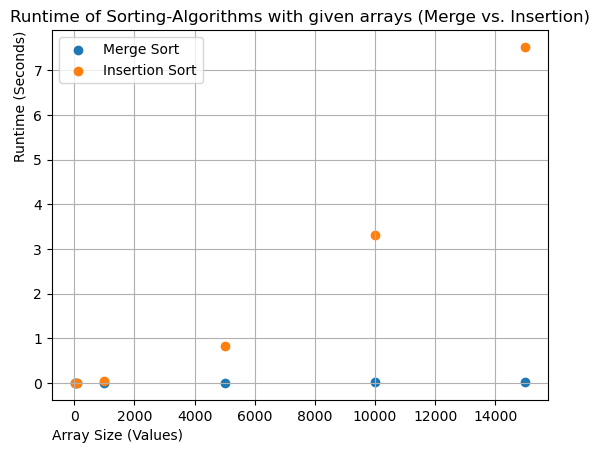

In [54]:
plot_times(times=run_1, title="Runtime of Sorting-Algorithms with given arrays (Merge vs. Insertion)", yscale="linear")

In [36]:
# Only for demonstration purposes: A run of the implemented methods with larger arrays. Depending on availiable system recources this will take rather long.
# The execution on a MacBook Air with 16GB Ram and a M1 processor took 10 minutes, 5.8 seconds.
# To bring your own system and patiance to ist limits remove comment-foormating from line 7 in this cell :)

upper_4 = 50000
upper_list_4 = list(range(0, upper_4 + 1, 2500))
# run_4 = create_runtimes(value_list=upper_list_4)

In [52]:
# Copy of data which will get produced in by "create_runtimes(value_list=upper_list_4)" which run for ca. 10 minutes.
data_run_4 = {0: {'merge': 0.0, 'insertion': 0.0}, 2500: {'merge': 0.004, 'insertion': 0.2132}, 5000: {'merge': 0.0067, 'insertion': 0.8195}, 7500: {'merge': 0.0104, 'insertion': 1.8685}, 10000: {'merge': 0.0145, 'insertion': 3.2942}, 12500: {'merge': 0.0184, 'insertion': 5.1931}, 15000: {'merge': 0.0221, 'insertion': 7.4242}, 17500: {'merge': 0.0268, 'insertion': 10.1956}, 20000: {'merge': 0.0306, 'insertion': 13.2548}, 22500: {'merge': 0.0352, 'insertion': 16.9081}, 25000: {'merge': 0.0388, 'insertion': 20.7582}, 27500: {'merge': 0.044, 'insertion': 25.4151}, 30000: {'merge': 0.0477, 'insertion': 30.1193}, 32500: {'merge': 0.0522, 'insertion': 35.6775}, 35000: {'merge': 0.0569, 'insertion': 41.1894}, 37500: {'merge': 0.0624, 'insertion': 47.7837}, 40000: {'merge': 0.0662, 'insertion': 54.1333}, 42500: {'merge': 0.0719, 'insertion': 61.1568}, 45000: {'merge': 0.076, 'insertion': 68.5317}, 47500: {'merge': 0.0794, 'insertion': 76.3259}, 50000: {'merge': 0.0838, 'insertion': 84.6517}}
display_time_deltas(data_run_4)

Runtime with array of range 0: {'merge': 0.0, 'insertion': 0.0} seconds.
Runtime with array of range 2500: {'merge': 0.004, 'insertion': 0.2132} seconds.
Runtime with array of range 5000: {'merge': 0.0067, 'insertion': 0.8195} seconds.
Runtime with array of range 7500: {'merge': 0.0104, 'insertion': 1.8685} seconds.
Runtime with array of range 10000: {'merge': 0.0145, 'insertion': 3.2942} seconds.
Runtime with array of range 12500: {'merge': 0.0184, 'insertion': 5.1931} seconds.
Runtime with array of range 15000: {'merge': 0.0221, 'insertion': 7.4242} seconds.
Runtime with array of range 17500: {'merge': 0.0268, 'insertion': 10.1956} seconds.
Runtime with array of range 20000: {'merge': 0.0306, 'insertion': 13.2548} seconds.
Runtime with array of range 22500: {'merge': 0.0352, 'insertion': 16.9081} seconds.
Runtime with array of range 25000: {'merge': 0.0388, 'insertion': 20.7582} seconds.
Runtime with array of range 27500: {'merge': 0.044, 'insertion': 25.4151} seconds.
Runtime with a

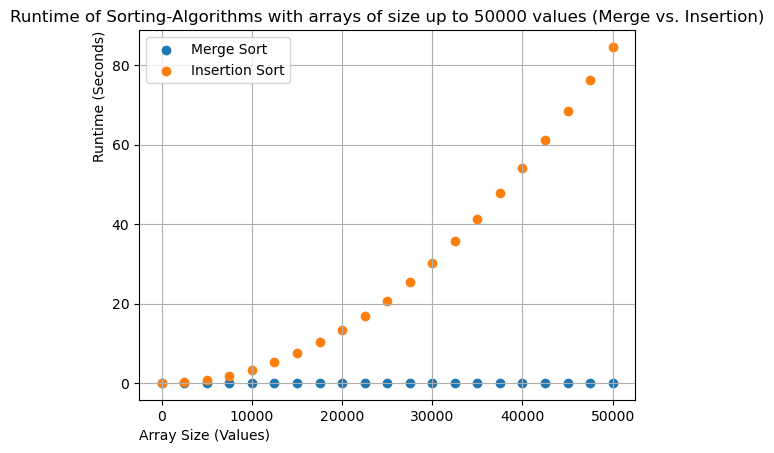

In [53]:
plot_times(times=data_run_4, title=f"Runtime of Sorting-Algorithms with arrays of size up to {upper_4} values (Merge vs. Insertion)", yscale="linear")